1. 구글 드라이브 마운트

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. 파일 불러오기

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('/content/drive/MyDrive/DSL session/22-1학기 기초세션 시각화/time_payment_type.csv')
df.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_timerange,order_day,payment_sequential,payment_type,payment_installments,payment_value
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,0,1,credit_card,1,18.12
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,0,3,voucher,1,2.00
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,0,2,voucher,1,18.59
3,3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,3,0,1,boleto,1,141.46
4,4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,0,1,credit_card,3,179.12


3. Bar chart 생성  
(1) 시간 별 payment type의 차이  
(2) 요일 별 payment type의 차이  
(3) 카테고리 별 payment type의 차이  

(+) 데이터 프레임 수정 (time 열 추가된 새로운 데이터 프레임 생성)

In [50]:
# 불러온 데이터프레임에 hour 열 추가 & MON(morning), AFT(afternoon), EVE(evening), NIG(night)로 hour 분할
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

df['hour'] = df.order_purchase_timestamp.dt.hour         # 시(숫자)

MON = df[(5 < df['hour']) & (df['hour'] < 12)]   # 6,7,8,9,10,11
AFT = df[(11 < df['hour']) & (df['hour'] < 18)]   # 12,13,14,15,16,17
EVE = df[(17 < df['hour']) & (df['hour'] < 24)]   # 18,19,20,21,22,23
NIG = df[df['hour'] < 6]   # 0,1,2,3,4,5

MON['time'] = 'MON'
AFT['time'] = 'AFT'
EVE['time'] = 'EVE'
NIG['time'] = 'NIG'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [51]:
# MON(morning), AFT(afternoon), EVE(evening), NIG(night) 병합
# df_time = 데이터 프레임에 time 열 추가 
df_time = pd.concat([MON, AFT, EVE, NIG])
df_time.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_timerange,order_day,payment_sequential,payment_type,payment_installments,payment_value,hour,time
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,0,1,credit_card,1,18.12,10,MON
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,0,3,voucher,1,2.00,10,MON
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,0,2,voucher,1,18.59,10,MON
4,4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,0,1,credit_card,3,179.12,8,MON
10,10,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,1,1,2,voucher,1,161.42,11,MON


In [52]:
# payment type별 시간별 총 합 구하기 (ex. sum_by_pay_crd: credit card로 구매한 횟수가 MON, AFT, EVE, NIG 에 각각 몇 번인지를 알아보기 위함)
sum_by_pay_crd = df_time[df_time['payment_type'] == 'credit_card'].groupby('time').payment_type.count()
sum_by_pay_blt = df_time[df_time['payment_type'] == 'boleto'].groupby('time').payment_type.count()
sum_by_pay_vou = df_time[df_time['payment_type'] == 'voucher'].groupby('time').payment_type.count()
sum_by_pay_dbt = df_time[df_time['payment_type'] == 'debit_card'].groupby('time').payment_type.count()

In [53]:
# 위의 정보로 데이터프레임 생성
ax = pd.concat([sum_by_pay_crd, sum_by_pay_blt, sum_by_pay_vou, sum_by_pay_dbt], axis=1)
ax.columns = ['credit_card', 'boleto', 'voucher', 'debit_card']
ax = ax.reindex(index=['MON','AFT','EVE','NIG'])
ax

,credit_card,boleto,voucher,debit_card
time,,,,
MON,15998,5030,1099,336
AFT,28549,7613,1975,586
EVE,26504,5656,2090,492
NIG,3535,892,329,72


(1) 시간 별 payment type의 차이

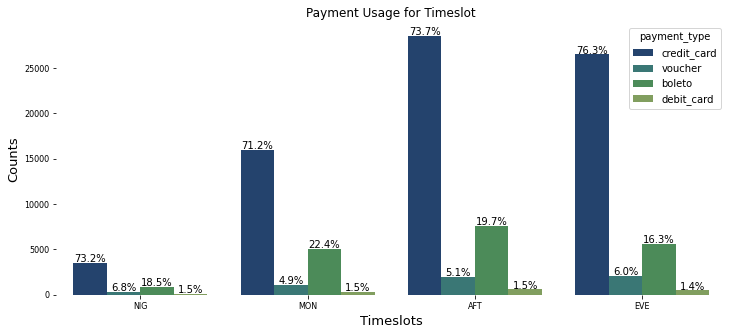

In [54]:
# bar chart 그리기 : 판매량에 있어서 시간 별로 payment_type에 따른 차이가 있는지를 확인하기 위함

b = 4 #카테고리 수 ('NIG', 'MON', 'AFT', 'EVE')
c = 4 #카테고리 안에 변수 (credit_card, boleto, voucher, debit_card )
total = []
time_name = ['NIG','MON', 'AFT', 'EVE']

for i in range(b):  total.append(len(df_time[df_time["time"]== time_name[i]]))
total2 = total * c

plt.figure(figsize=(12, 5))
sns.set_palette("gist_earth")
ax1 = sns.countplot(data=df_time, x="time", hue="payment_type", order = ['NIG', 'MON', 'AFT', 'EVE'])
ax1.set_title('Payment Usage for Timeslot', fontsize=12)
plt.xticks(fontsize=8, rotation=0)
plt.yticks(fontsize=8)
plt.xlabel('Timeslots', fontsize=13)
p = plt.ylabel('Counts', fontsize=13)

# 각각의 bar마다 차지하는 퍼센트 나타내기
for i, p in enumerate(ax1.patches):  
    percentage = '{:.1f}%'.format(100 * p.get_height()/total2[i])
    x =  p.get_x() + p.get_width()/2
    y = p.get_height() + 100
    ax1.annotate(percentage, (x, y),ha='center')
plt.box(False)

In [67]:
df['dayofweek']  = df.order_purchase_timestamp.dt.dayofweek    # 요일
df.loc[(df.dayofweek==0), 'dayofweek'] = 'Monday'
df.loc[(df.dayofweek==1), 'dayofweek'] = 'Tuesday'
df.loc[(df.dayofweek==2), 'dayofweek'] = 'Wednesday'
df.loc[(df.dayofweek==3), 'dayofweek'] = 'Thursday'
df.loc[(df.dayofweek==4), 'dayofweek'] = 'Friday'
df.loc[(df.dayofweek==5), 'dayofweek'] = 'Saturday'
df.loc[(df.dayofweek==6), 'dayofweek'] = 'Sunday'
df.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_timerange,order_day,payment_sequential,payment_type,payment_installments,payment_value,hour,dayofweek
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,0,1,credit_card,1,18.12,10,Monday
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,0,3,voucher,1,2.00,10,Monday
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,0,2,voucher,1,18.59,10,Monday
3,3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,3,0,1,boleto,1,141.46,20,Tuesday
4,4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,0,1,credit_card,3,179.12,8,Wednesday


(2) 요일 별 payment type의 차이

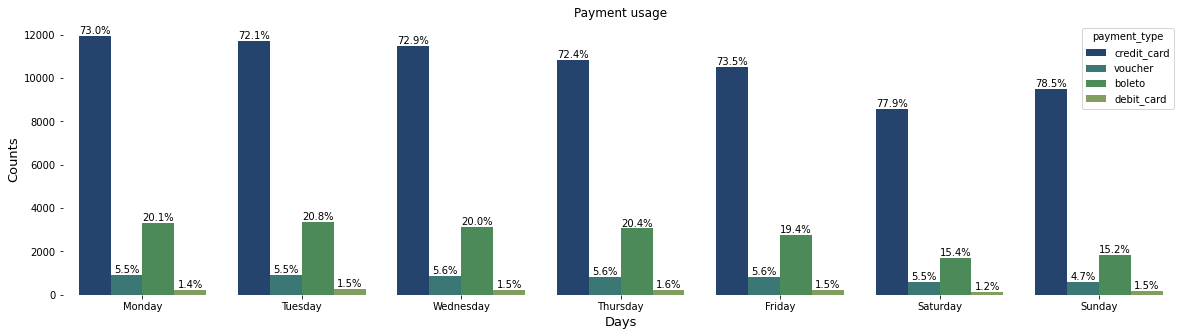

In [68]:
# bar chart 그리기 : 판매량에 있어서 요일 별로 payment_type에 따른 차이가 있는지를 확인하기 위함

b = 7 #카테고리 수 ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
c = 4 #카테고리 안에 변수 (credit_card, boleto, voucher, debit_card )
total = []
day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i in range(b):  total.append(len(df[df['dayofweek']==day[i]]))
total2 = total * c

plt.figure(figsize=(20, 5))
ax = sns.countplot(data = df, x="dayofweek", hue="payment_type", order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.set_title('Payment usage', fontsize=12)
plt.xlabel('Days', fontsize=13)
p=plt.ylabel('Counts', fontsize=13)

for i, p in enumerate(ax.patches):
    percentage = '{:.1f}%'.format(100 * p.get_height()/total2[i])
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 100
    ax.annotate(percentage, (x, y),ha='center')
   
plt.box(False)
plt.show()

In [60]:
# 요일을 다시 weekday(Mon ~ Fri), weekend(Sat, Sun)로 구분된 데이터 프레임 df_ww 생성 
df_ww = df
df_ww.loc[(df_ww.dayofweek=='Monday'), 'dayofweek'] = 'Weekday'
df_ww.loc[(df_ww.dayofweek=='Tuesday'), 'dayofweek'] = 'Weekday'
df_ww.loc[(df_ww.dayofweek=='Wednesday'), 'dayofweek'] = 'Weekday'
df_ww.loc[(df_ww.dayofweek=='Thursday'), 'dayofweek'] = 'Weekday'
df_ww.loc[(df_ww.dayofweek=='Friday'), 'dayofweek'] = 'Weekday'
df_ww.loc[(df_ww.dayofweek=='Saturday'), 'dayofweek'] = 'Weekend'
df_ww.loc[(df_ww.dayofweek=='Sunday'), 'dayofweek'] = 'Weekend'
df_ww.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_timerange,order_day,payment_sequential,payment_type,payment_installments,payment_value,hour,dayofweek
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,0,1,credit_card,1,18.12,10,Weekday
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,0,3,voucher,1,2.00,10,Weekday
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,0,2,voucher,1,18.59,10,Weekday
3,3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,3,0,1,boleto,1,141.46,20,Weekday
4,4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,0,1,credit_card,3,179.12,8,Weekday


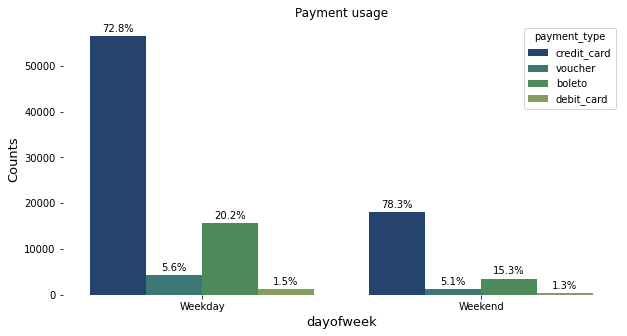

In [61]:
# bar chart 그리기 : 판매량에 있어서 Weekend, Weekday 별로 payment_type에 따른 차이가 있는지를 확인하기 위함

b = 2 #카테고리 수 ('Weekday', 'Weekend')
c = 4 #카테고리 안에 변수 (credit_card, boleto, voucher, debit_card )
total = []
week = ['Weekday', 'Weekend']
for i in range(b):  total.append(len(df_ww[df_ww['dayofweek']==week[i]]))
total2 = total * c


plt.figure(figsize=(10, 5))
ax=sns.countplot(data=df_ww, x="dayofweek", hue="payment_type")
ax.set_title('Payment usage', fontsize=12)
plt.xlabel('dayofweek', fontsize=13)
p=plt.ylabel('Counts', fontsize=13)

for i, p in enumerate(ax.patches):
    percentage = '{:.1f}%'.format(100 * p.get_height()/total2[i])
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 1000
    ax.annotate(percentage, (x, y),ha='center')
   
plt.box(False)
plt.show()

(+)  데이터 프레임 수정 (product_category_name_english 열 추가된 새로운 데이터 프레임 생성)

In [62]:
# category 파일과 name translation 파일을 불러오기 
# category 데이터 프레임에 trans 데이터 프레임의 product_category_name_english를 추가 (product_category_name을 기준으로)
category = pd.read_csv('/content/drive/MyDrive/DSL session/22-1학기 기초세션 시각화/time_category.csv')
trans = pd.read_csv('/content/drive/MyDrive/DSL session/22-1학기 기초세션 시각화/product_category_name_translation.csv')
category_t = pd.merge(category, trans, left_on='product_category_name', right_on='product_category_name')
category_t.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_timerange,order_day,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,0,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3,0,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,3,0,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,3,0,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,975,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21 00:00:00,3,0,1,be021417a6acb56b9b50d3fd2714baa8,f5f46307a4d15880ca14fab4ad9dfc9b,2017-11-30 00:21:09,339.00,17.12,utilidades_domesticas,48.0,664.0,6.0,14300.0,38.0,34.0,34.0,housewares


In [63]:
# new = customer_id를 기준으로 df_time에 product_category_name_english 추가된 데이터 프레임
new = pd.merge(category_t[["customer_id","product_category_name_english"]], df_time, left_on='customer_id', right_on='customer_id')
new.head()

,customer_id,product_category_name_english,Unnamed: 0,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_timerange,order_day,payment_sequential,payment_type,payment_installments,payment_value,hour,time
0,9ef432eb6251297304e76186b10a928d,housewares,0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,0,1,credit_card,1,18.12,10,MON
1,9ef432eb6251297304e76186b10a928d,housewares,1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,0,3,voucher,1,2.00,10,MON
2,9ef432eb6251297304e76186b10a928d,housewares,2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,0,2,voucher,1,18.59,10,MON
3,a20e8105f23924cd00833fd87daa0831,housewares,26096,128e10d95713541c87cd1a2e48201934,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3,0,1,credit_card,3,37.77,18,EVE
4,26c7ac168e1433912a51b924fbd34d34,housewares,27120,0e7e841ddf8f8f2de2bad69267ecfbcf,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,3,0,1,credit_card,1,37.77,18,EVE


In [64]:
# topten = catogory_name 중 판매순위 상위 10개만 남겨두고 나머지 카테고리는 삭제된 데이터 프레임
topten = new[(new.product_category_name_english == 'furniture_decor') | 
             (new.product_category_name_english == 'bed_bath_table') | 
             (new.product_category_name_english == 'sports_leisure') |
             (new.product_category_name_english == 'health_beauty') |
             (new.product_category_name_english == 'housewares') |
             (new.product_category_name_english == 'watches_gifts') |
             (new.product_category_name_english == 'computers_accessories') |
             #(new.product_category_name_english == 'telephone') |
             (new.product_category_name_english == 'garden_tools') |
             (new.product_category_name_english == 'vehicle_related_product') |
             (new.product_category_name_english == 'office_furniture')] 
topten.head()

,customer_id,product_category_name_english,Unnamed: 0,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_timerange,order_day,payment_sequential,payment_type,payment_installments,payment_value,hour,time
0,9ef432eb6251297304e76186b10a928d,housewares,0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,0,1,credit_card,1,18.12,10,MON
1,9ef432eb6251297304e76186b10a928d,housewares,1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,0,3,voucher,1,2.00,10,MON
2,9ef432eb6251297304e76186b10a928d,housewares,2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,0,2,voucher,1,18.59,10,MON
3,a20e8105f23924cd00833fd87daa0831,housewares,26096,128e10d95713541c87cd1a2e48201934,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3,0,1,credit_card,3,37.77,18,EVE
4,26c7ac168e1433912a51b924fbd34d34,housewares,27120,0e7e841ddf8f8f2de2bad69267ecfbcf,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,3,0,1,credit_card,1,37.77,18,EVE


(3) 카테고리 별 payment type의 차이

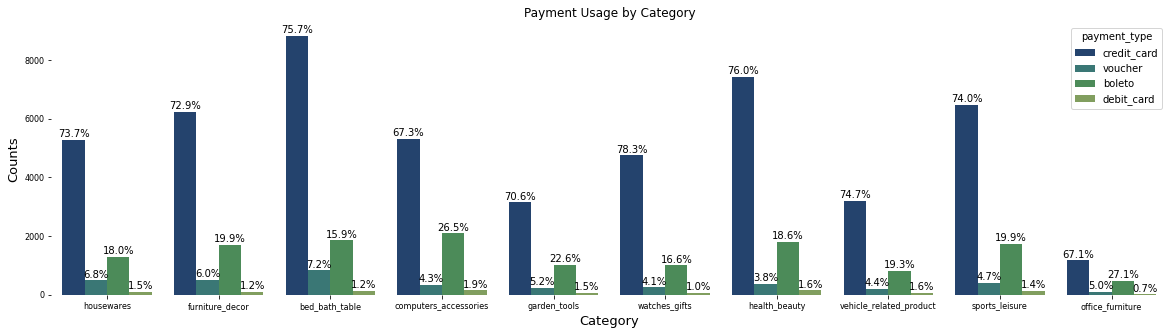

In [65]:
# bar chart 그리기 : 판매량에 있어서 상위 10개 카테고리 별로 payment_type에 따른 차이가 있는지를 확인하기 위함

b = 10 # 카테고리 수 ('housewares', 'furniture_decor', 'bed_bath_table', 'computers_accessories', 'garden_tools','watches_gifts','health_beauty',
       #              'vehicle_related_product', 'sports_leisure','office_furniture')
c = 4 # 카테고리 안에 변수 (credit_card, boleto, voucher, debit_card )
total = []
category_name = ['housewares', 'furniture_decor', 'bed_bath_table', 'computers_accessories', 'garden_tools','watches_gifts','health_beauty',
                 'vehicle_related_product', 'sports_leisure','office_furniture']

for i in range(b):  total.append(len(topten[topten["product_category_name_english"]== category_name[i]]))
total2 = total * c

plt.figure(figsize=(20, 5))
sns.set_palette("gist_earth")
ax = sns.countplot(data=topten, x="product_category_name_english", hue="payment_type")
ax.set_title('Payment Usage by Category', fontsize=12)

plt.xticks(fontsize=8, rotation=0)
plt.yticks(fontsize=8)
plt.xlabel('Category', fontsize=13)
p = plt.ylabel('Counts', fontsize=13)
for i, p in enumerate(ax.patches):
    percentage = '{:.1f}%'.format(100 * p.get_height()/total2[i])
    x =  p.get_x() + p.get_width()/2
    y = p.get_height() + 100
    ax.annotate(percentage, (x, y),ha='center')
plt.box(False)